In [ ]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime


In [121]:
SV_anxiety = pd.read_csv("/Users/astridrybner/Library/CloudStorage/OneDrive-AarhusUniversitet/datalab/twitter-public-anxiety/other_data/SV_anxiety.csv")
SV_anxiety['date'] = pd.to_datetime(SV_anxiety['date']).dt.date # make date time format
SV_anxiety['anxiety_mean'] = SV_anxiety['mean'] 
SV_anxiety = SV_anxiety.drop(['Unnamed: 0', 'dyad', 'mean'], axis = 1)
SV_anxiety.head()


,date,anxiety_mean
0,2020-08-04,0.339097
1,2020-08-05,0.334705
2,2020-08-06,0.318388
3,2020-08-07,0.317497
4,2020-08-08,0.326618


In [158]:
mobility = pd.read_csv("/Users/astridrybner/Library/CloudStorage/OneDrive-AarhusUniversitet/datalab/twitter-public-anxiety/other_data/Google_mobility_changes-visitors-covid_sv.csv")
mobility['date'] = pd.to_datetime(mobility['Day']).dt.date # make date time format
mobility = mobility[mobility['Entity']=='Sweden'] # choose sweden 
mobility = mobility.loc[:, ['date','workplaces', 'grocery_and_pharmacy', 'transit_stations']]
mobility = mobility[(mobility['date']>datetime.date(2020,8,1)) & (mobility['date']<datetime.date(2020,8,31))]  # filter only august
mobility.head()


Index(['Entity', 'Code', 'Day', 'retail_and_recreation',
       'grocery_and_pharmacy', 'residential', 'transit_stations', 'parks',
       'workplaces'],
      dtype='object')


In [159]:
hospitalization = pd.read_csv("/Users/astridrybner/Library/CloudStorage/OneDrive-AarhusUniversitet/datalab/twitter-public-anxiety/other_data/Google_mobility_current-covid-patients-hospital.csv")
hospitalization = hospitalization[hospitalization['Entity']=='Sweden'] # choose sweden 
hospitalization['date'] = pd.to_datetime(hospitalization['Day']).dt.date # make date time format
hospitalization = hospitalization.loc[:,['date', 'Daily hospital occupancy']]
hospitalization = hospitalization[(hospitalization['date']>datetime.date(2020,8,1)) & (hospitalization['date']<datetime.date(2020,8,31))]  # filter only august
hospitalization.head()

Index(['Entity', 'Code', 'Day', 'Daily hospital occupancy'], dtype='object')


In [161]:
stringency = pd.read_csv("/Users/astridrybner/Library/CloudStorage/OneDrive-AarhusUniversitet/datalab/twitter-public-anxiety/other_data/Stringency_index_owid-covid-data.csv")
stringency = stringency[stringency['location']=='Sweden'] # choose sweden 
stringency = stringency.loc[:,['date', 'new_cases_smoothed', 'new_deaths_smoothed', 'new_cases_smoothed_per_million']] # choose cols of interest
stringency['date'] = pd.to_datetime(stringency['date']).dt.date # make date time format
stringency_final = stringency[(stringency['date']>datetime.date(2020,8,1)) & (stringency['date']<datetime.date(2020,8,31))]  # filter only august
stringency_final.head()

,date,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million
167723,2020-08-02,222.286,6.571,21.878
167724,2020-08-03,235.714,6.571,23.200
167725,2020-08-04,243.000,6.429,23.917
167726,2020-08-05,260.714,4.286,25.660
167727,2020-08-06,271.571,3.857,26.729


In [150]:
# mobility, stringency, hospitalization,
df1 = pd.merge(SV_anxiety, stringency, on = "date") #.fillna(0)
df2 = pd.merge(df1, hospitalization, on = "date")
df = pd.merge(df2, mobility, on = "date")
dates = pd.DataFrame(df['date'])
#date = dates.set_index('date')

measures = df.drop('date', axis=1)
normalized_measures = pd.DataFrame((measures-measures.min())/(measures.max()-measures.min()))


In [151]:
final = pd.concat([dates, normalized_measures], axis = 1)
final.head()

,date,anxiety_mean,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million,Daily hospital occupancy,workplaces,grocery_and_pharmacy,transit_stations
0,2020-08-04,1.000000,0.671565,1.000000,0.671561,1.000000,0.000000,1.000000,0.000000
1,2020-08-05,0.915477,0.762673,0.558872,0.762646,0.876712,0.068048,0.912964,0.060458
2,2020-08-06,0.601478,0.818514,0.470564,0.818510,0.643836,0.142857,0.825928,0.272592
3,2020-08-07,0.584321,0.908156,NaN,0.908131,0.643836,0.204095,0.869446,0.363598
4,2020-08-08,0.759843,0.876561,0.353026,0.876568,0.657534,0.204095,0.912964,0.302927


In [152]:
melted = pd.melt(final, id_vars=['date'], 
                    value_vars=['anxiety_mean', 'new_cases_smoothed', 'new_cases_smoothed_per_million', 'Daily hospital occupancy', 'workplaces', 'grocery_and_pharmacy', 'transit_stations'], 
                    var_name = 'measure', 
                    value_name = 'mean')

Text(0.5, 1.0, 'Development in anxiety and covid measures (SE)')

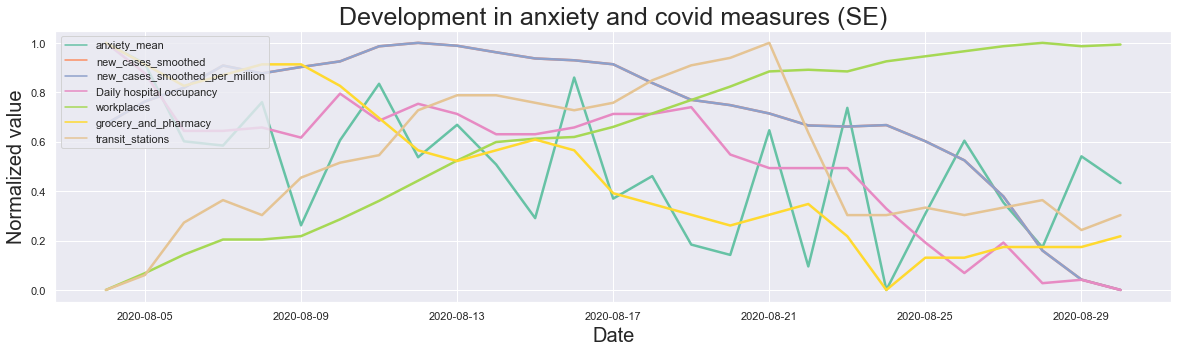

In [156]:
sns.set(rc={'figure.figsize':(20,5)})
plot = sns.lineplot(data = melted, x = "date", y = "mean", hue = 'measure', palette = "Set2",linewidth = 2.5)
plot.legend(loc='upper left')
plot.set_xlabel("Date", fontsize = 20)
plot.set_ylabel("Normalized value", fontsize = 20)
plot.set_title("Development in anxiety and covid measures (SE)", fontsize = 25)
#plt.savefig(os.path.join("plots", "primaryEmotions.jpg"))

Text(0.5, 1.0, 'Development in anxiety and covid measures (SE) - rolling mean (7 days)')

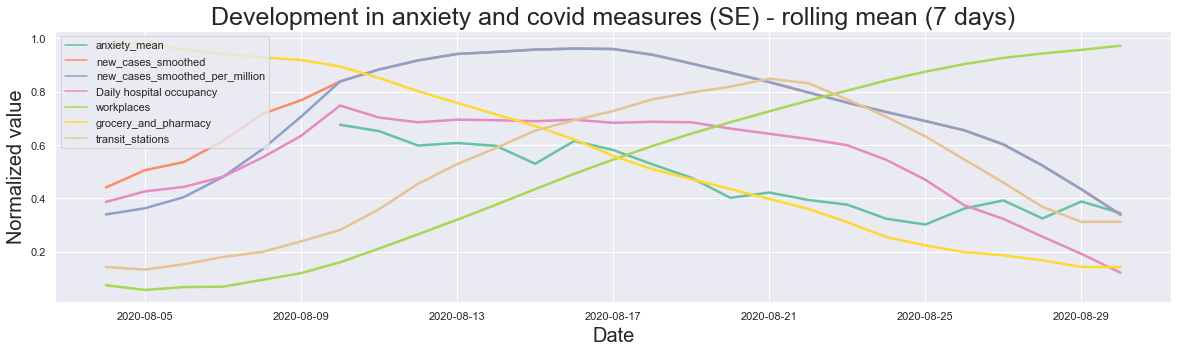

In [169]:
#.skewness_mean.rolling(10).mean()
melted['rolling_mean'] = melted['mean'].rolling(7).mean()

sns.set(rc={'figure.figsize':(20,5)})
plot = sns.lineplot(data = melted, x = "date", y = "rolling_mean", hue = 'measure', palette = "Set2",linewidth = 2.5)
plot.legend(loc='upper left')
plot.set_xlabel("Date", fontsize = 20)
plot.set_ylabel("Normalized value", fontsize = 20)
plot.set_title("Development in anxiety and covid measures (SE) - rolling mean (7 days)", fontsize = 25)
#plt.savefig(os.path.join("plots", "primaryEmotions.jpg"))

# Data exploration

In [162]:
stringency = pd.read_csv("/Users/astridrybner/Library/CloudStorage/OneDrive-AarhusUniversitet/datalab/twitter-public-anxiety/other_data/Stringency_index_owid-covid-data.csv")
hospitalization = pd.read_csv("/Users/astridrybner/Library/CloudStorage/OneDrive-AarhusUniversitet/datalab/twitter-public-anxiety/other_data/Google_mobility_current-covid-patients-hospital.csv")
mobility = pd.read_csv("/Users/astridrybner/Library/CloudStorage/OneDrive-AarhusUniversitet/datalab/twitter-public-anxiety/other_data/Google_mobility_changes-visitors-covid_sv.csv")




In [166]:
stringency.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't